In [24]:
nl.head()
nl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 74 non-null     int64  
 1   City               74 non-null     object 
 2   Date               74 non-null     object 
 3   Season             74 non-null     int64  
 4   MatchNumber        74 non-null     object 
 5   Team1              74 non-null     object 
 6   Team2              74 non-null     object 
 7   Venue              74 non-null     object 
 8   TossWinner         74 non-null     object 
 9   TossDecision       74 non-null     object 
 10  SuperOver          74 non-null     object 
 11  WinningTeam        74 non-null     object 
 12  WonBy              74 non-null     object 
 13  Margin             74 non-null     int64  
 14  method             0 non-null      float64
 15  Player_of_Match    74 non-null     object 
 16  Team1Players       74 non-nu

In [1]:
import pandas as pd
import numpy as np

nl = pd.read_csv('IPL_Matches_2022.csv')

nl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1304051,Pune,2022-03-29,2022,5,Rajasthan Royals,Sunrisers Hyderabad,"Maharashtra Cricket Association Stadium, Pune",Sunrisers Hyderabad,field,N,Rajasthan Royals,Runs,61,NaN,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa...",BNJ Oxenford,UV Gandhe
70,1304050,Mumbai,2022-03-28,2022,4,Lucknow Super Giants,Gujarat Titans,"Wankhede Stadium, Mumbai",Gujarat Titans,field,N,Gujarat Titans,Wickets,5,NaN,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P...",PG Pathak,VK Sharma
71,1304049,Mumbai,2022-03-27,2022,3,Royal Challengers Bangalore,Punjab Kings,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,field,N,Punjab Kings,Wickets,5,NaN,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...",Nitin Menon,YC Barde
72,1304048,Mumbai,2022-03-27,2022,2,Mumbai Indians,Delhi Capitals,"Brabourne Stadium, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,4,NaN,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR...",RJ Tucker,HAS Khalid


In [23]:
toss_win_effect = nl[nl['TossWinner'] == nl['WinningTeam']].shape[0] / nl.shape[0] * 100

print(f'The percentage of matches where the toss-winning team also won the match is {toss_win_effect:.2f}%')

The percentage of matches where the toss-winning team also won the match is 48.65%


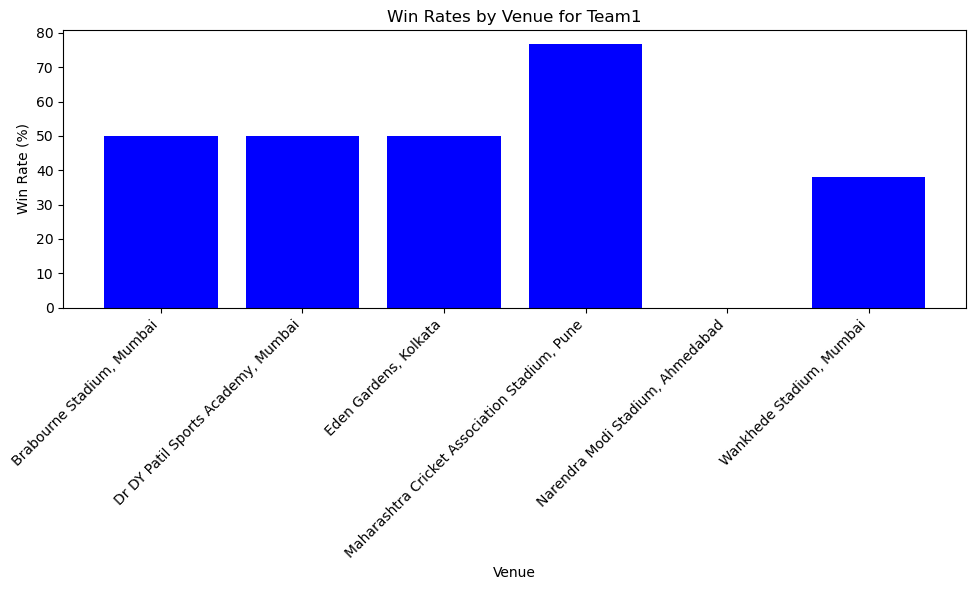

In [7]:
venue_impact = nl.groupby('Venue').apply(lambda x: (x['Team1'] == x['WinningTeam']).sum() / len(x) * 100).reset_index()
venue_impact.columns = ['Venue', 'WinRate']

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(venue_impact['Venue'], venue_impact['WinRate'], color='blue')
plt.xlabel('Venue')
plt.ylabel('Win Rate (%)')
plt.title('Win Rates by Venue for Team1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

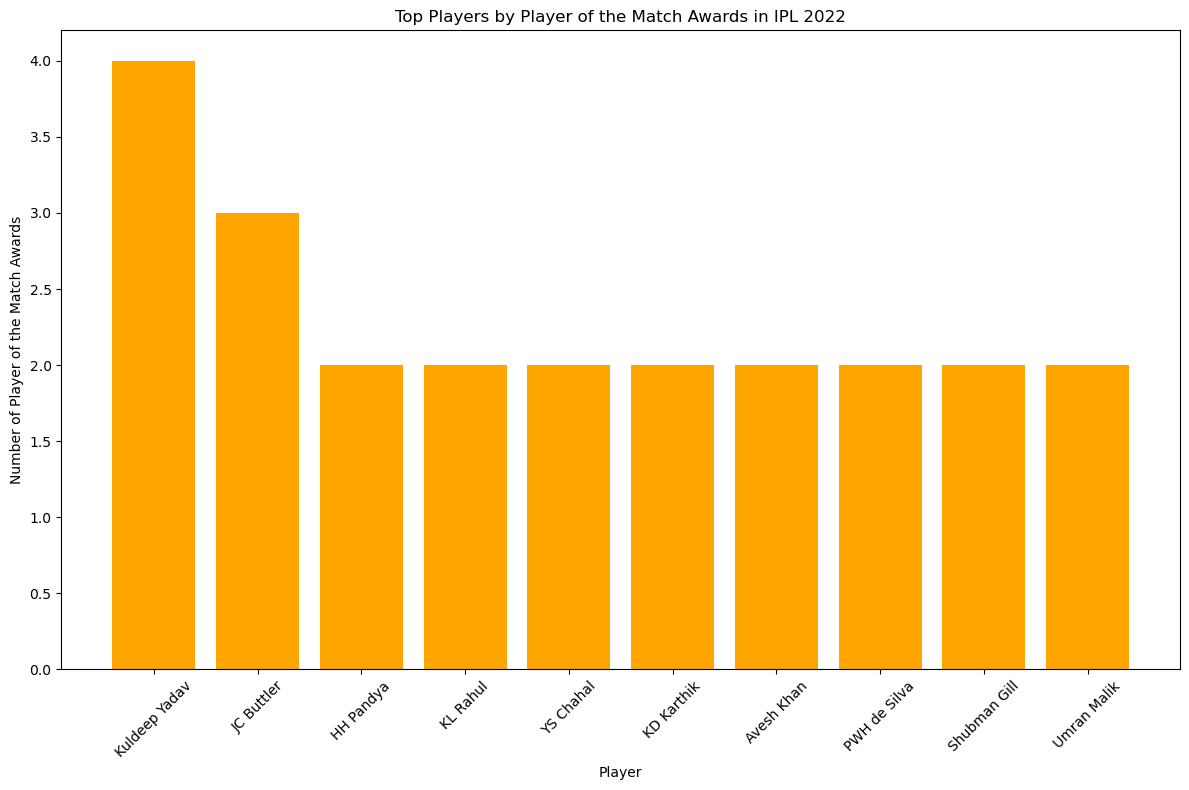

In [19]:
player_of_the_match_counts = nl['Player_of_Match'].value_counts().head(10)

plt.figure(figsize=(12, 8), facecolor='white')
plt.bar(player_of_the_match_counts.index, player_of_the_match_counts.values, color='orange')
plt.xlabel('Player')
plt.ylabel('Number of Player of the Match Awards')
plt.title('Top Players by Player of the Match Awards in IPL 2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()